In [5]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:

df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
#Unnamed: 0 isn't really neeeded in this dataset so we drop it
del df['Unnamed: 0']

In [9]:
#depicting the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YE

In [10]:
#renaming the columns so we can refer to them
df.colunmns = ['BO_ROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE_MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE']
df.head()

C:\Users\ousma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
#checking for nulls in the dataset, the dataset showing that
#there aren't missing values while there are
#futher int he analuysis we will redefine the types of the  features
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Preprocessing

In [12]:
# re-defining the types of the features so that the missing values can be refered to
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [13]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [14]:
#just to make sure we got everything we'll d ot he same thing for the other features
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('category')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')

# Data Quality report

In [39]:
df.describe()

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,2.998758,7.455043,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,1.289790,9.022975,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3.000000,6.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,4.000000,13.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,46.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [15]:
#missing values are showing for all the attributes now
#noticing the number of missing values in three of the columns
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [16]:
#removing attributes related to the lcaotion of the buildings
del df['ZIP CODE']
del df['BUILDING CLASS AT TIME OF SALE']
del df['BUILDING CLASS AT PRESENT']
del df['APARTMENT NUMBER']
del df['ADDRESS']


In [17]:
#figured that this attribute had redundant values
df['EASE-MENT'].describe()

count     84548
unique        1
top            
freq      84548
Name: EASE-MENT, dtype: object

In [18]:
#removed it of the dataset
del df['EASE-MENT']

In [19]:
#this column depicts categorical values 
df['BOROUGH'].describe()

count     84548
unique        5
top           4
freq      26736
Name: BOROUGH, dtype: int64

In [20]:
df['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [21]:
#converted the BOROUGH feature to numeric values
df["BOROUGH"] =  pd.to_numeric(df['BOROUGH'], errors = 'coerce')

In [22]:
df['TAX CLASS AT TIME OF SALE'].describe()

count     84548
unique        4
top           1
freq      41533
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [23]:
# tax class has categorical values as well therefore we'll have to convert
#them to numerical values
#droped tax class at time present
df['TAX CLASS AT TIME OF SALE'] = pd.to_numeric(df['TAX CLASS AT TIME OF SALE'], errors = 'coerce')
df = df.drop(['TAX CLASS AT PRESENT'], axis = 1)

In [24]:
df['TAX CLASS AT TIME OF SALE'].value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [25]:
#del df['TAX CLASS AT PRESENT']

In [26]:
df['NEIGHBORHOOD'].describe()

count              84548
unique               254
top       FLUSHING-NORTH
freq                3068
Name: NEIGHBORHOOD, dtype: object

In [27]:
df['BUILDING CLASS CATEGORY'].describe()

count                                           84548
unique                                             47
top       01 ONE FAMILY DWELLINGS                    
freq                                            18235
Name: BUILDING CLASS CATEGORY, dtype: object

In [28]:
df = df.drop(columns=["SALE DATE", "BLOCK", "LOT", "NEIGHBORHOOD"],axis=1)

In [29]:
#label encoding of building class category
df["BUILDING CLASS CATEGORY"] = df["BUILDING CLASS CATEGORY"].cat.codes

In [30]:
#columns with the missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [31]:
df.isnull().sum()

BOROUGH                          0
BUILDING CLASS CATEGORY          0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             26252
GROSS SQUARE FEET            27612
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                   14561
dtype: int64

In [32]:
#percentage of the missing values
#sale price  >>  17%
#LAND SQUARE FEET >> 31%
# GROSS SQUARE FEET >> 32%
df_missing = (df.isnull().sum()/ len(df) ) * 100
df_missing = df_missing[df_missing > 0]
df_missing.sort_values(inplace=True)
df_missing


SALE PRICE           17.222170
LAND SQUARE FEET     31.049818
GROSS SQUARE FEET    32.658372
dtype: float64

In [38]:
sb.set(style='whitegrid',color_codes=True)
sb.barplot(x='BOROUGH', y='count',data=df_missing)
plt.xticks(rotation=90)
sb

ValueError: Could not interpret input 'BOROUGH'

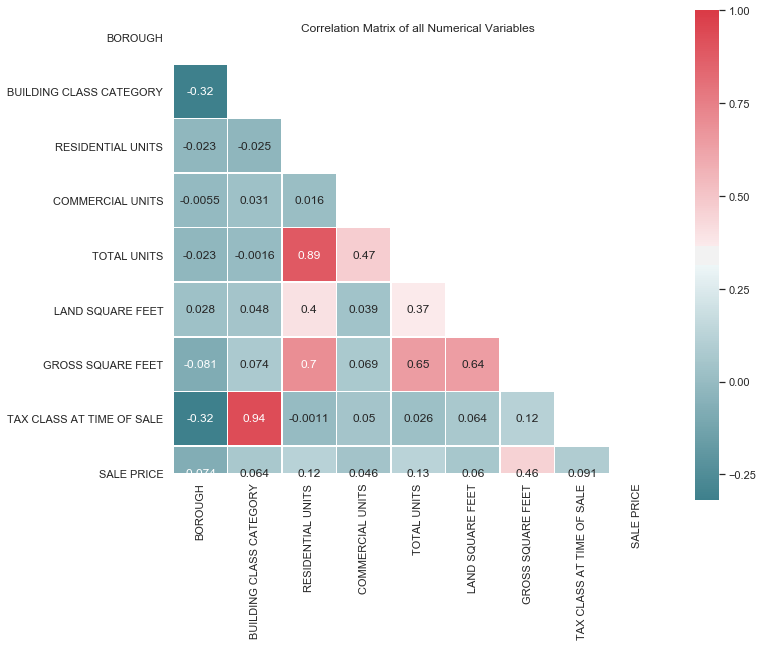

In [173]:
# Compute the correlation matrix
d= df[['BOROUGH', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE','SALE PRICE']]
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(210, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, 
            square=True, linewidths= .5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [174]:
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,6,5,0,5,1633.0,6440.0,1900,2,6625000.0
1,1,6,28,3,31,4616.0,18690.0,1900,2,NaN
2,1,6,16,1,17,2212.0,7803.0,1900,2,NaN
3,1,6,10,0,10,2272.0,6794.0,1913,2,3936272.0
4,1,6,6,0,6,2369.0,4615.0,1900,2,8000000.0


In [192]:
from sklearn.impute import KNNImputer
x, y, z = np.array_split(df, 3)
KNN =  KNNImputer(n_neighbors = 3)
x = KNN.fit_transform(x)
y = KNN.fit_transform(y)
z = KNN.fit_transform(z)

In [193]:
data = pd.DataFrame(np.concatenate((x, y, z), axis=0))
data.columns = df.columns

#Save data
data.to_csv('preprocessedNYCdata.csv', encoding='utf-8', index=False)

In [205]:
#new preprocessed data
data = pd.read_csv('preprocessedNYCdata.csv')
data.shape

(84548, 10)

In [206]:
#now we notice that the missing values are gone
data.isnull().sum()


BOROUGH                      0
BUILDING CLASS CATEGORY      0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [207]:
#Outlier Analysis
#data significanly changes because of the  rows dropped
from scipy import stats
z = np.abs(stats.zscore(data))
data = data[(z < 3).all(axis=1)]
data.shape

(73589, 10)

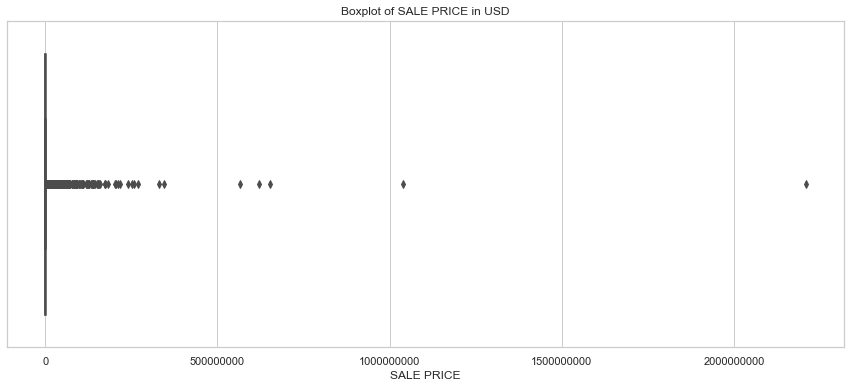

In [208]:
#Box plot of the sale price

plt.figure(figsize = (15,6))
sb.boxplot(x = 'SALE PRICE', data = df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

# Plots

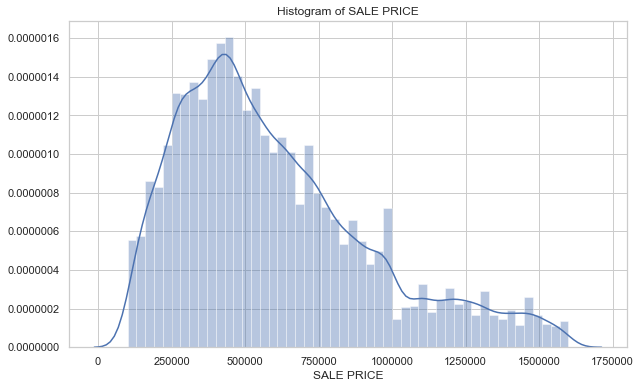

In [209]:
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 1600000)]
plt.figure(figsize=(10,6))
plt.title('Histogram of SALE PRICE')
sb.distplot(data['SALE PRICE'])
plt.show()

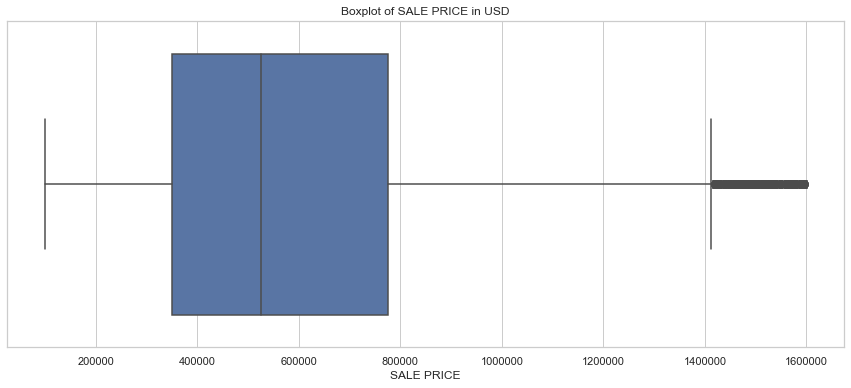

In [210]:
plt.figure(figsize=(15,6))

sb.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [211]:
grouped = df[['BUILDING CLASS CATEGORY','SALE PRICE']].copy()

#Calculating mean sale price for each building class from data
grouped = grouped.groupby(['BUILDING CLASS CATEGORY']).mean()
grouped = grouped.sort_values('SALE PRICE')
grouped

,SALE PRICE
BUILDING CLASS CATEGORY,
18,0.000000e+00
46,6.075926e+03
44,1.882678e+04
41,9.433105e+04
45,1.066754e+05
36,1.100000e+05
5,2.438431e+05
4,4.230553e+05
8,4.812575e+05


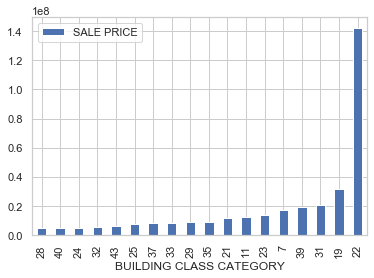

In [212]:
# grouped bar plot of the building class category
hgrouped = grouped.iloc[29:]
hgrouped.sort_values('SALE PRICE').plot.bar()

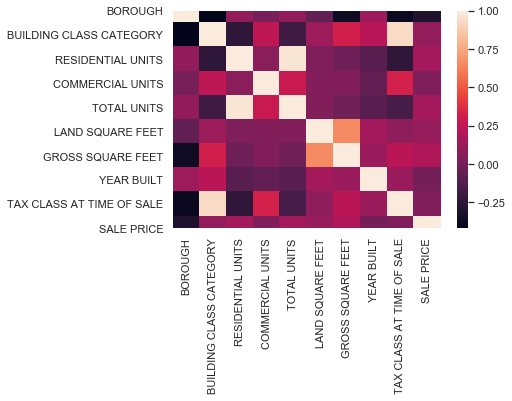

In [213]:
corr = data.corr()
sb.heatmap(corr)

In [214]:
data = data[(data['LAND SQUARE FEET'] < 57500) & (data['LAND SQUARE FEET'] > 250)]


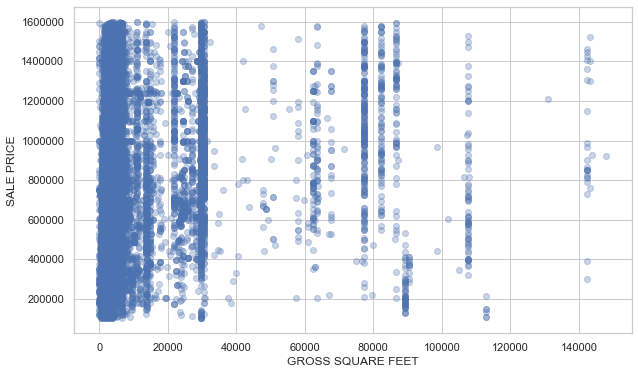

In [215]:
#Scatterplot of Gross Square Feet vs Sale Price
plt.figure(figsize=(10,6))
sb.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

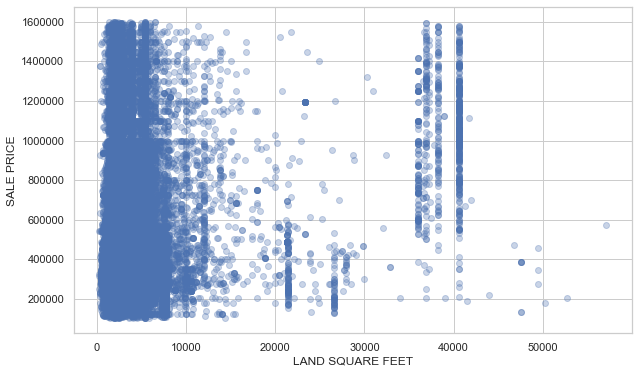

In [216]:
plt.figure(figsize=(10,6))
sb.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

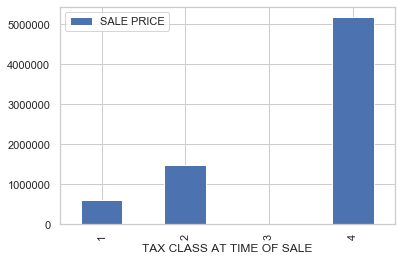

In [217]:
grouped = df[['TAX CLASS AT TIME OF SALE','SALE PRICE']].copy()
grouped = grouped.groupby(['TAX CLASS AT TIME OF SALE']).mean()
grouped.plot.bar()

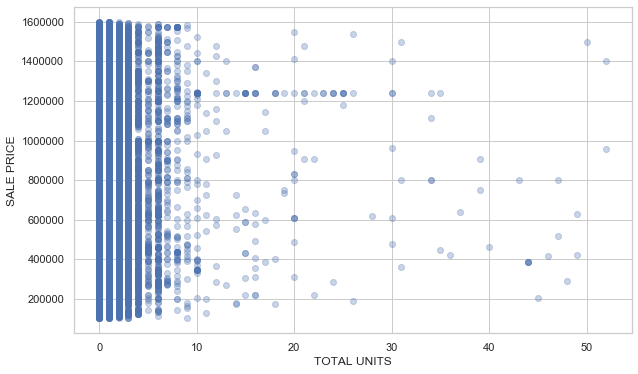

In [218]:
plt.figure(figsize=(10,6))
sb.regplot(x='TOTAL UNITS', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

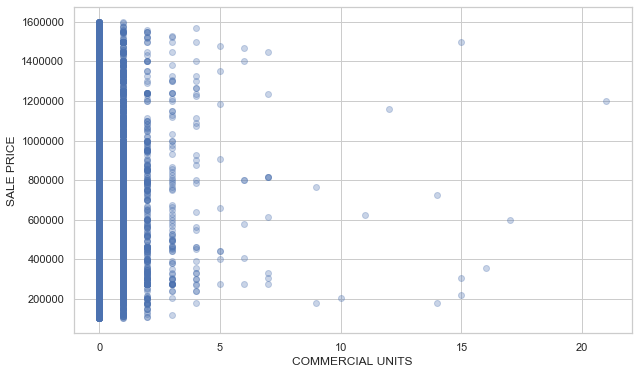

In [219]:
plt.figure(figsize=(10,6))
sb.regplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

In [220]:
scaler = preprocessing.StandardScaler()
scaler.fit(data)
stdData = pd.DataFrame(scaler.transform(data))
stdData.columns = data.columns

In [236]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [221]:
x = data.drop(['TAX CLASS AT TIME OF SALE'], axis = 1)
y = data['TAX CLASS AT TIME OF SALE']

# KNN Classification

In [222]:
# train and test splits
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [224]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    print(" score for ", i," neighbors is : ", model.score(x_test, y_test))

 score for  1  neighbors is :  0.8719040522319211
 score for  2  neighbors is :  0.8742459726066284
 score for  3  neighbors is :  0.8742459726066284
 score for  4  neighbors is :  0.8688524590163934
 score for  5  neighbors is :  0.8707685756866085
 score for  6  neighbors is :  0.8666524732098503
 score for  7  neighbors is :  0.868000851607409
 score for  8  neighbors is :  0.8660137676531119
 score for  9  neighbors is :  0.86629763678944
 score for  10  neighbors is :  0.8645234546873891


In [237]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[8677,  647,   21],
       [ 840, 3596,   20],
       [ 157,   87,   46]], dtype=int64)

In [238]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.91      9345
         2.0       0.83      0.81      0.82      4456
         4.0       0.53      0.16      0.24       290

    accuracy                           0.87     14091
   macro avg       0.75      0.63      0.66     14091
weighted avg       0.87      0.87      0.87     14091



In [239]:
rmse(y_test,y_pred)

0.4995917714659923

# Linear Regression

In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9026983888701942

In [227]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ousma\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

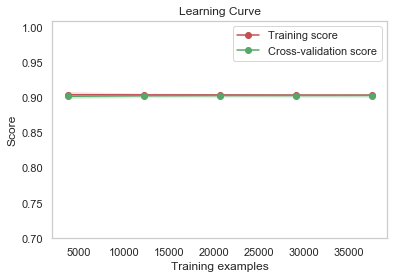

In [228]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, "Learning Curve", x, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

In [240]:
rmse(y_test,y_pred)

0.4995917714659923

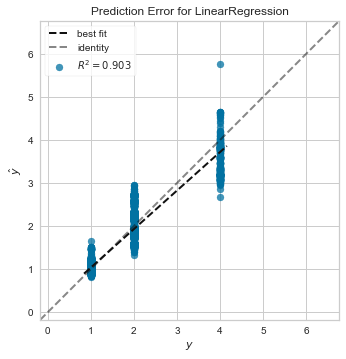

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import prediction_error

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = prediction_error(model, x_train, y_train, x_test, y_test)

# K-Means CLustering

In [233]:
from sklearn.cluster import KMeans
for i in range(1,13):
    model = KMeans(n_clusters=i, random_state=0, init = 'random')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model score for ", i ," clusters is : ", model.score(x_test, y_test))

Model score for  1  clusters is :  -1465984989841244.0
Model score for  2  clusters is :  -476000364505055.4
Model score for  3  clusters is :  -221821375917415.88
Model score for  4  clusters is :  -125722810285094.33
Model score for  5  clusters is :  -81807628461608.23
Model score for  6  clusters is :  -60068411934153.03
Model score for  7  clusters is :  -44878574996056.16
Model score for  8  clusters is :  -34340650556973.555
Model score for  9  clusters is :  -27728228107220.973
Model score for  10  clusters is :  -22790221454871.438
Model score for  11  clusters is :  -19414028772035.516
Model score for  12  clusters is :  -17557195800059.951


In [234]:
model = KMeans(n_clusters=4, random_state=0, init = 'random')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

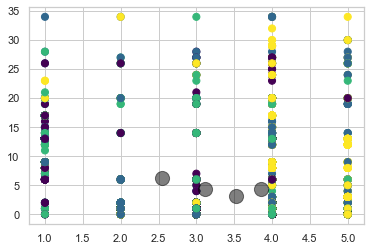

In [235]:
xnp = x_test.to_numpy()
plt.scatter(xnp[:, 0], xnp[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);